# Redshift Data of DESIJ0136-0008

Author: Anowar Shajib, S M Rafee Adnan

## Load data

In [1]:
!pip install astropy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 738.7/738.7 kB 25.2 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
from astropy.io import fits
from astropy.wcs import WCS

In [3]:
data, header = fits.getdata(
    "/kaggle/input/fits-file/DESIJ0136-0008_F140W_drz_sci.fits", header=True
)

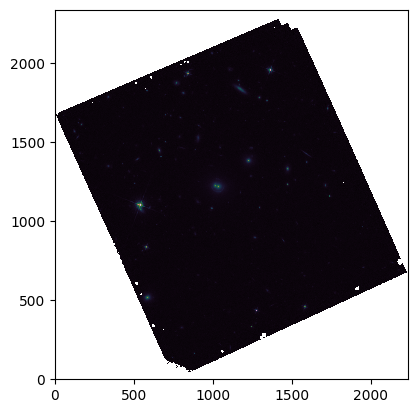

In [4]:
plt.imshow(np.log10(data), origin="lower", cmap="cubehelix", interpolation="nearest")

In [ ]:
# need to be changed for each cluster file
FILENAME = (
    "/kaggle/input/redshift-desij0136-0008-updated/redshift_DESIJ0136-0008_updated.csv"
)
data_legacy = pd.read_csv(FILENAME, delimiter=",")
data_legacy.head()

,_r,id,RAJ2000,DEJ2000,release,brickid,objid,type,pstar,gmmcomp,zphot,e_zphot,fclean,fqual
0,0.013514,8000330464007805,24.163392,0.124849,8000,330464,7805,PSF,0.003,P6,0.592,0.129,1,1
1,0.013767,8000331904000062,24.158093,0.125291,8000,331904,62,REX,0.000,R5,1.196,0.237,1,1
2,0.012903,8000331904000065,24.165838,0.125870,8000,331904,65,EXP,0.020,E5,1.014,0.124,1,1
3,0.013285,8000331904000067,24.164435,0.125190,8000,331904,67,REX,0.057,R5,1.377,0.530,1,0
4,0.012522,8000331904000098,24.160866,0.125918,8000,331904,98,REX,0.010,R0,0.627,0.531,1,0


In [6]:
%matplotlib widget
wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    data_legacy["RAJ2000"], data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.3
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy["objid"][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(
        f"{obj_id}", (x, y), textcoords="offset points", xytext=(0, 10), ha="center"
    )

# Add labels
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

plt.show()

Canvas(toolbar=None)

In [7]:
# In degrees
center_x, center_y = 24.1625000, 0.1383333  # RA 01:36:39 DEC 00:08:18
radii = 55  # in arcsec
radii_deg = radii / 3600

x_upper, y_upper = center_x + radii_deg, center_y + radii_deg
x_lower, y_lower = center_x - radii_deg, center_y - radii_deg

x_limit_upper, y_limit_upper = wcs.all_world2pix(x_upper, y_upper, 0)
x_limit_lower, y_limit_lower = wcs.all_world2pix(x_lower, y_lower, 0)

print(x_limit_upper, x_limit_lower)

369.36551021381797 1744.3614588218757


In [8]:
data_legacy_cropped = data_legacy[
    (data_legacy["RAJ2000"] < x_upper)
    & (data_legacy["RAJ2000"] > x_lower)
    & (data_legacy["DEJ2000"] < y_upper)
    & (data_legacy["DEJ2000"] > y_lower)
]

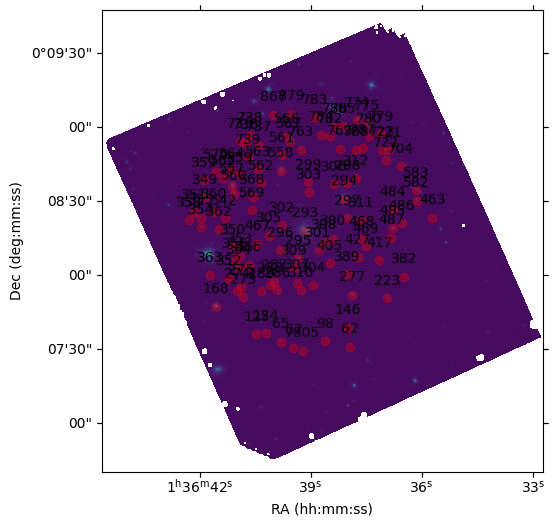

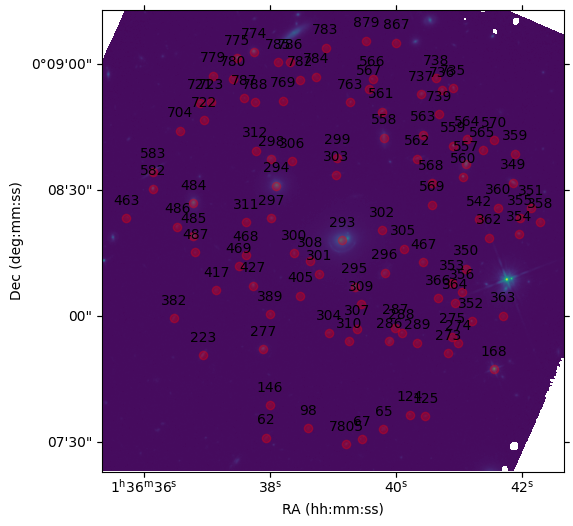

In [9]:
%matplotlib inline

wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    data_legacy["RAJ2000"], data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.3
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy["objid"][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(
        f"{obj_id}", (x, y), textcoords="offset points", xytext=(0, 10), ha="center"
    )

# Add labels
ax.set_xlim(x_limit_lower, x_limit_upper)
ax.set_ylim(y_limit_lower, y_limit_upper)
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

In [10]:
data_legacy.sort_values(by="objid")

# central deflector
central_deflector_id = 293
object_ids = [central_deflector_id, 300, 301, 302, 308]

columns_to_drop = [
    "id",
    "release",
    "brickid",
    "fclean",
    "fqual",
]  # List of column names to drop
data_legacy_dropped = data_legacy.drop(columns=columns_to_drop)

selected_data_legacy = data_legacy_dropped[
    data_legacy_dropped["objid"].isin(object_ids)
]
selected_data_legacy.set_index("objid", inplace=True)

print(selected_data_legacy)

             _r    RAJ2000   DEJ2000  type  pstar gmmcomp  zphot  e_zphot
objid                                                                    
293    0.000636  24.163136  0.138352  COMP  0.002      C9  0.340    0.035
300    0.002707  24.159930  0.137483   EXP  0.002      E5  0.905    0.197
301    0.002361  24.161611  0.136146   REX  0.009      R5  1.020    0.537
302    0.003328  24.165760  0.139003   EXP  0.045      E1  0.586    0.148
308    0.002025  24.160978  0.136998   PSF  0.065      P0  0.615    0.630


In [11]:
zphot_deflector = selected_data_legacy.loc[central_deflector_id, "zphot"]
del_z = 0.03 * (1 + zphot_deflector)
print("zphot_deflector:", zphot_deflector)
print("del_z:", del_z)
data_legacy_cropped_dropped = data_legacy_cropped.drop(columns=columns_to_drop)
data_legacy_cropped_dropped.set_index("objid", inplace=True)
# selected_data_legacy.set_index("objid", inplace=True)

not_neighbour_data_legacy = data_legacy_cropped_dropped[
    (data_legacy_cropped_dropped["zphot"] <= zphot_deflector - del_z)
    | (data_legacy_cropped_dropped["zphot"] >= zphot_deflector + del_z)
]

print(not_neighbour_data_legacy)

zphot_deflector: 0.34
del_z: 0.0402
             _r    RAJ2000   DEJ2000 type  pstar gmmcomp  zphot  e_zphot
objid                                                                   
7805   0.013514  24.163392  0.124849  PSF  0.003      P6  0.592    0.129
62     0.013767  24.158093  0.125291  REX  0.000      R5  1.196    0.237
65     0.012903  24.165838  0.125870  EXP  0.020      E5  1.014    0.124
67     0.013285  24.164435  0.125190  REX  0.057      R5  1.377    0.530
98     0.012522  24.160866  0.125918  REX  0.010      R0  0.627    0.531
...         ...        ...       ...  ...    ...     ...    ...      ...
786    0.012124  24.159690  0.150128  PSF  0.003      P0  1.871    0.732
787    0.011085  24.156616  0.147728  PSF  0.000      P7  0.904    0.395
788    0.010481  24.157378  0.147478  PSF  0.007      P6  0.759    0.095
867    0.013734  24.166701  0.151409  REX  0.002      R0  1.125    0.714
879    0.013395  24.164699  0.151547  PSF  0.000      P7  1.113    0.334

[100 rows x 8 

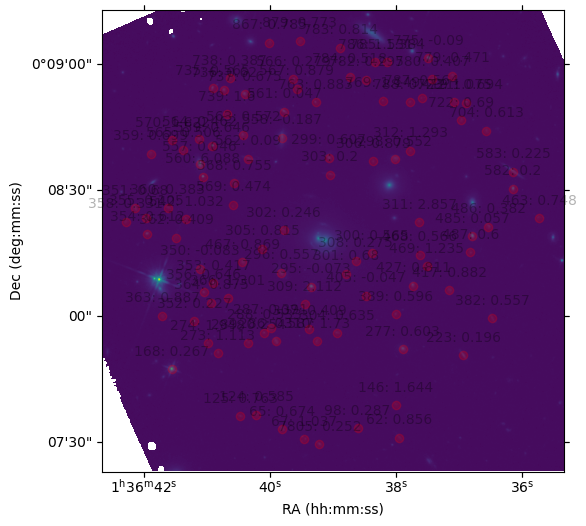

In [12]:
%matplotlib inline
wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    not_neighbour_data_legacy["RAJ2000"], not_neighbour_data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.2
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = not_neighbour_data_legacy.index[
        i
    ]  # Accessing the 'objid' column from your DataFrame
    zphot = not_neighbour_data_legacy.iloc[i]["zphot"]
    plt.annotate(
        f"{obj_id}: {round(zphot - zphot_deflector, 3)}",
        (x, y),
        textcoords="offset points",
        xytext=(0, 10),
        ha="center",
        alpha=0.3,
    )

ax.set_xlim(x_limit_lower, x_limit_upper)
ax.set_ylim(y_limit_lower, y_limit_upper)

ax.invert_xaxis()
# Add labels
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

plt.show()

## Save the Redshift data to the YAML file

In [13]:
# Existing YAML file with other parameters
existing_yaml_file = "/kaggle/input/point-estimates/DESIJ0136-0008_point_estimates.yml"

# Variables to include in the YAML file
z_phot = selected_data_legacy.loc[central_deflector_id, "zphot"]
e_zphot = selected_data_legacy.loc[central_deflector_id, "e_zphot"]

environment_variables = {"z_phot": [z_phot, e_zphot]}

# make all the numpy variales to float
environment_variables = {
    key: [float(item) for item in value] if isinstance(value, list) else float(value)
    for key, value in environment_variables.items()
}

# Load existing YAML content if the file exists
existing_content = {}
try:
    with open(existing_yaml_file, "r") as file:
        existing_content = yaml.safe_load(file)
except FileNotFoundError:
    pass

# Update the existing content with new variables
existing_content.update(environment_variables)

# Write the updated content back to the YAML file
# with open(existing_yaml_file, "w") as file:
#     yaml.dump(existing_content, file, default_flow_style=False)